# 4. Training Classifier

In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#Try different classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:

# # Dataframe
# path_df = "Data/df.pickle"
# with open(path_df, 'rb') as data:
#     df = pickle.load(data)

# # features_train
# path_features_train = "Data/features_train.pickle"
# with open(path_features_train, 'rb') as data:
#     features_train = pickle.load(data)

# # labels_train
# path_labels_train = "Data/labels_train.pickle"
# with open(path_labels_train, 'rb') as data:
#     labels_train = pickle.load(data)

# # features_test
# path_features_test = "Data/features_test.pickle"
# with open(path_features_test, 'rb') as data:
#     features_test = pickle.load(data)

# # labels_test
# path_labels_test = "Data/labels_test.pickle"
# with open(path_labels_test, 'rb') as data:
#     labels_test = pickle.load(data)

In [3]:
path_df = 'Data/df.csv'
df = pd.read_csv(path_df, index_col = 0)

# features_train
path_features_train = "Data/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Data/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [4]:
print(features_train.shape)
print(features_test.shape)

df

(1891, 300)
(334, 300)


,File_Name,Category,Content,Content_Parsed,Category_Code
0,Data/bbc\business\001.txt,business,Ad sales boost Time Warner profit\n\nQuarterly...,ad sales boost time warner profit quarterly p...,0
1,Data/bbc\business\002.txt,business,Dollar gains on Greenspan speech\n\nThe dollar...,dollar gain greenspan speech dollar hit h...,0
2,Data/bbc\business\003.txt,business,Yukos unit buyer faces loan claim\n\nThe owner...,yukos unit buyer face loan claim owners emb...,0
3,Data/bbc\business\004.txt,business,High fuel prices hit BA's profits\n\nBritish A...,high fuel price hit ba profit british airways...,0
4,Data/bbc\business\005.txt,business,Pernod takeover talk lifts Domecq\n\nShares in...,pernod takeover talk lift domecq share uk dr...,0
...,...,...,...,...,...
2220,Data/bbc\tech\397.txt,tech,BT program to beat dialler scams\n\nBT is intr...,bt program beat dialler scam bt introduce t...,4
2221,Data/bbc\tech\398.txt,tech,Spam e-mails tempt net shoppers\n\nComputer us...,spam e-mail tempt net shoppers computer users...,4
2222,Data/bbc\tech\399.txt,tech,Be careful how you code\n\nA new European dire...,careful code new european directive could...,4
2223,Data/bbc\tech\400.txt,tech,US cyber security chief resigns\n\nThe man mak...,us cyber security chief resign man make sure...,4


In [41]:
models = {1:'Logistic Regression',
          2:'Multinomial Naive Bayes', 
          3:'K Nearest Neighbour', 
          4:'Support Vector Machines', 
          5:'Random Forest'}

## Cross-Validation for Hyperparameter Tuning

In [42]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.

choice = 5
if choice == 1:
    classifier = LogisticRegression(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==2:
    classifier = MultinomialNB()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    print(classifier)
elif choice==3:
    classifier =KNeighborsClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==4:
    classifier =svm.SVC(random_state=8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==5:
    classifier = RandomForestClassifier(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())

Parameters currently in use in Random Forest:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


### Randomized Search Cross Validation

Cari parameter yang secara random menggunakan cross validation.

In [43]:
if choice == 1:
    # Create the random grid logistic regression
    random_grid = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
               'class_weight': ['balanced', None],
               'penalty': ['l2']}
elif choice==2:
    pass
elif choice==3:
    pass
elif choice==4:
    # Create the random grid SVM
    random_grid = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
                  'kernel': ['rbf'],
                  'gamma': [.0001, .001, .01, .1, 1, 10, 100],
                  'degree': [3],
                  'probability': [False]
                 }
elif choice==5:
    # Create the random grid Random Forest
    random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 40, 60, 80, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }
    
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [44]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  9.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [47]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.9423585404547858


### Grid Search Cross Validation

Kemudian lanjutkan pencarian yang lebih detil terhadap daerah nilai terbaik hasil random search di atas.

In [59]:

# Create the parameter grid based on the results of random search 
param_grid = {
               'max_features': ['sqrt'],
               'max_depth': [40],
               'min_samples_leaf': [1]}

# Create a base model
classifier = RandomForestClassifier(random_state = 8)

In [60]:
# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=8,
                                              verbose=0,

In [61]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1}

The mean accuracy of a model with these hyperparameters is:
0.8944


In [62]:
best_classifier = grid_search.best_estimator_

best_classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

### Model fit and performance

In [63]:
best_classifier.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [64]:
classifier_pred = best_classifier.predict(features_test)

In [66]:
d = {
     'Model': 'Random Forest Classifier',
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred)
}

df_models = pd.DataFrame(d, index=[0])
df_models

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest Classifier,0.999471,0.907186


In [67]:
# Classification report
print("Classification report")
print(classification_report(labels_test,classifier_pred))

Classification report
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        81
           1       0.85      0.90      0.87        49
           2       0.98      0.81      0.89        72
           3       0.96      0.96      0.96        72
           4       0.95      0.92      0.93        60

    accuracy                           0.91       334
   macro avg       0.91      0.91      0.91       334
weighted avg       0.91      0.91      0.91       334



### Confusion Matrix

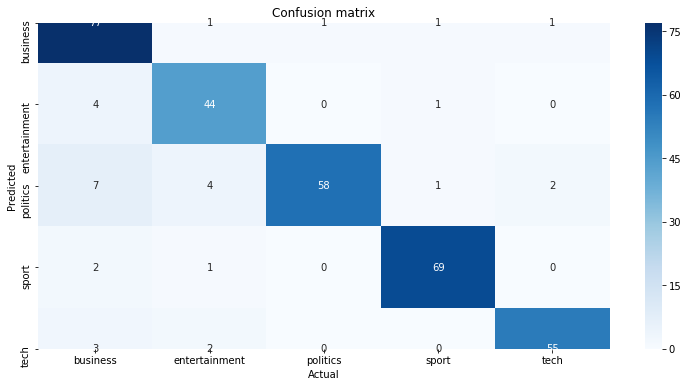

In [69]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Bandingkan performansi dengan base model, yaitu model dengan parameter default.

In [78]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.907185628742515

In [79]:
best_classifier.fit(features_train, labels_train)
accuracy_score(labels_test, best_classifier.predict(features_test))

0.907185628742515

# Latihan

1. Ubah format penyimpanan data ke CSV
2. Coba buatkan feature berikut (save dan upload feature), lalu laporkan pengaruhnya terhadap akurasi klasifikasi:
    a. Tanpa proses normalisation
    b. Tanpa proses lemmatisation
    c. Tanpa menghilangkan stopwords
3. Coba buat tfidf dengan nilai "max_features" yang berbeda-beda (lebih besar dan lebih kecil dari 300), lalu laporkan pengaruhnya terhadap akurasi klasifikasi.
4. Coba dengan beberapa algoritma klasifikasi yang berbeda (minimal 2 algoritma), carilah parameter terbaik (jelaskan nilai2 parameter yang telah dicoba untuk tiap jenis algoritma).
5. Jika anda ingin menggunakan teks bahasa Indonesia, bagian mana saja yang perlu dilakukan penyesuaian?
6. Opsional: Gunakan word embedding (e.g word2vec, GloVe).

# Jawaban

Jawaban ditulis dalam sebuah laporan singkat format pdf

In [80]:
classifier_pred0 = classifier_pred
train_score = accuracy_score(labels_train, best_classifier.predict(features_train))
# train_score

accuracy_score(labels_train, best_classifier.predict(features_train))

0.9994711792702274

## a. Tanpa normalization

In [82]:
path_df = 'Data/df1.csv'
df1 = pd.read_csv(path_df, index_col = 0)

# features_train
path_features_train = "Data/features_train1.pickle"
with open(path_features_train, 'rb') as data:
    features_train1 = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train1.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train1 = pickle.load(data)

# features_test
path_features_test = "Data/features_test1.pickle"
with open(path_features_test, 'rb') as data:
    features_test1 = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test1.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test1 = pickle.load(data)

In [83]:
print(features_train1.shape)
print(features_test1.shape)

(1891, 300)
(334, 300)


In [90]:
best_classifier.fit(features_train1,labels_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [91]:
train_score1 = accuracy_score(labels_train1, best_classifier.predict(features_train1))

In [92]:
classifier_pred1 = best_classifier.predict(features_test1)

In [93]:
accuracy_score(labels_test1, classifier_pred1)

0.8832335329341318

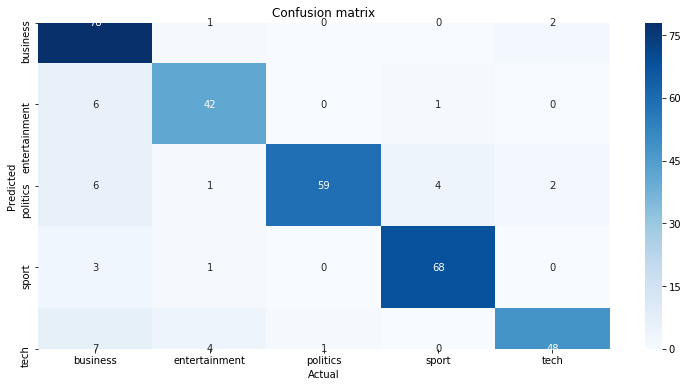

In [94]:
aux_df = df1[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred1)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

## b. Tanpa lemmatization

In [95]:
path_df = 'Data/df2.csv'
df2 = pd.read_csv(path_df, index_col = 0)

# features_train
path_features_train = "Data/features_train2.pickle"
with open(path_features_train, 'rb') as data:
    features_train2 = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train2.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train2 = pickle.load(data)

# features_test
path_features_test = "Data/features_test2.pickle"
with open(path_features_test, 'rb') as data:
    features_test2 = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test2.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test2 = pickle.load(data)

In [96]:
print(features_train2.shape)
print(features_test2.shape)

(1891, 300)
(334, 300)


In [97]:
best_classifier.fit(features_train2, labels_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [98]:
train_score2 = accuracy_score(labels_train2, best_classifier.predict(features_train2))

In [99]:
classifier_pred2 = best_classifier.predict(features_test2)

In [100]:
accuracy_score(labels_test2, classifier_pred2)

0.9041916167664671

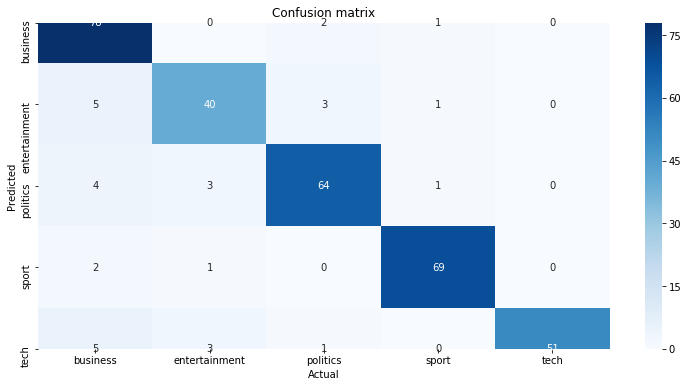

In [101]:
aux_df = df2[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred2)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

## c. Ignoring stopward

In [102]:
path_df = 'Data/df3.csv'
df3 = pd.read_csv(path_df, index_col = 0)

# features_train
path_features_train = "Data/features_train3.pickle"
with open(path_features_train, 'rb') as data:
    features_train3 = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train3.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train3 = pickle.load(data)

# features_test
path_features_test = "Data/features_test3.pickle"
with open(path_features_test, 'rb') as data:
    features_test3 = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test3.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test3 = pickle.load(data)

In [103]:
print(features_train.shape)
print(features_test.shape)

(1891, 300)
(334, 300)


In [104]:
best_classifier.fit(features_train3, labels_train3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [105]:
train_score3 = accuracy_score(labels_train3, best_classifier.predict(features_train3))
train_score3

0.9978847170809095

In [106]:
classifier_pred3 = best_classifier.predict(features_test3)

In [107]:
accuracy_score(labels_test3, classifier_pred3)

0.8652694610778443

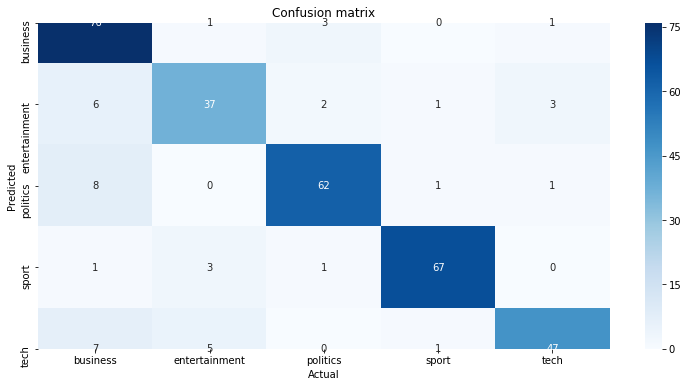

In [108]:
aux_df = df3[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred3)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

# Kesimpulan no 1

In [109]:
pd.DataFrame({
    'Model' : ['Normalisasi + Letimisasi + Stopward removal','Tanpa normalisasi', 'Tanpa lemitisasi', 'Tanpa stopward removal'],
    'Test set score' : [accuracy_score(labels_test, classifier_pred), accuracy_score(labels_test1, classifier_pred1), 
                       accuracy_score(labels_test2, classifier_pred2), accuracy_score(labels_test3, classifier_pred3)],
    'Train set score' : [train_score, train_score1, train_score2, train_score3]
})

,Model,Test set score,Train set score
0,Normalisasi + Letimisasi + Stopward removal,0.907186,0.999471
1,Tanpa normalisasi,0.883234,1.000000
2,Tanpa lemitisasi,0.904192,0.997356
3,Tanpa stopward removal,0.865269,0.997885


# No 2
## a. Max Features < 300

In [110]:
path_df = 'Data/df_more300.csv'
df_more300 = pd.read_csv(path_df, index_col = 0)

# features_train
path_features_train = "Data/features_train_more300.pickle"
with open(path_features_train, 'rb') as data:
    features_train_more300 = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train_more300.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train_more300 = pickle.load(data)

# features_test
path_features_test = "Data/features_test_more300.pickle"
with open(path_features_test, 'rb') as data:
    features_test_more300 = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test_more300.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test_more300 = pickle.load(data)

In [111]:
print(features_train_more300.shape)
print(features_test_more300.shape)
print(labels_test_more300.shape)
print(labels_train_more300.shape)

(1891, 400)
(334, 400)
(334,)
(1891,)


In [112]:
best_classifier.fit(features_train_more300, labels_train_more300)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [113]:
train_score_more300 = accuracy_score(labels_train_more300, best_classifier.predict(features_train_more300))
train_score_more300

0.9978847170809095

In [114]:
classifier_pred_more300 = best_classifier.predict(features_test_more300)

In [115]:
accuracy_score(labels_test_more300, classifier_pred_more300)

0.9131736526946108

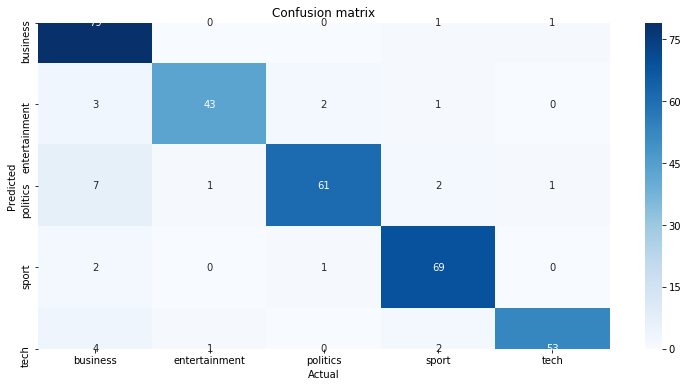

In [116]:
aux_df = df_more300[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_more300)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

# b. max_features < 300

In [117]:
path_df = 'Data/df_less300.csv'
df_less300 = pd.read_csv(path_df, index_col = 0)

# features_train
path_features_train = "Data/features_train_less300.pickle"
with open(path_features_train, 'rb') as data:
    features_train_less300 = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train_less300.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train_less300 = pickle.load(data)

# features_test
path_features_test = "Data/features_test_less300.pickle"
with open(path_features_test, 'rb') as data:
    features_test_less300 = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test_less300.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test_less300 = pickle.load(data)

In [118]:
best_classifier.fit(features_train_less300, labels_train_less300)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [119]:
train_score_less300 = accuracy_score(labels_train_less300, best_classifier.predict(features_train_less300))
train_score_less300

0.9989423585404548

In [120]:
classifier_pred_less300 = best_classifier.predict(features_test_less300)

In [121]:
accuracy_score(labels_test_less300, classifier_pred_less300)

0.8772455089820359

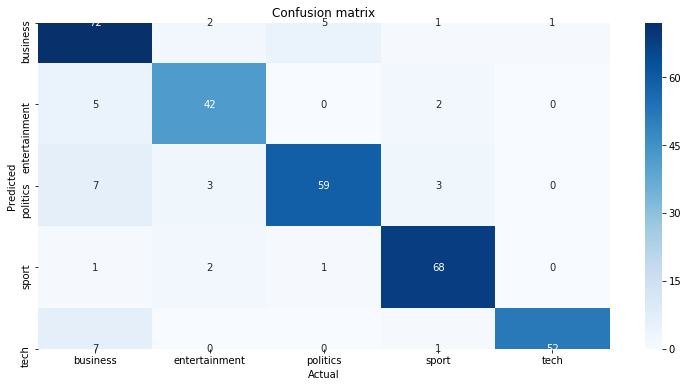

In [122]:
aux_df = df_less300[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred_less300)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [123]:
pd.DataFrame({
    'Max_features' : [400, 300, 200],
    'Train set accuracy' : [train_score_more300, train_score, train_score_less300],
    'Test set accuracy' : [accuracy_score(labels_test_more300, classifier_pred_more300), 
                            accuracy_score(labels_test, classifier_pred),
                            accuracy_score(labels_test_less300, classifier_pred_less300)]
})

,Max_features,Train set accuracy,Test set accuracy
0,400,0.997885,0.913174
1,300,0.999471,0.907186
2,200,0.998942,0.877246
